In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd 'drive/My Drive/dataset/cassava_leaf_disease'

/content/drive/My Drive/dataset/cassava_leaf_disease


In [5]:
import os
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train/healthy/train-healthy-85.jpg
train/healthy/train-healthy-94.jpg
train/healthy/train-healthy-243.jpg
train/healthy/train-healthy-180.jpg
train/healthy/train-healthy-89.jpg
train/healthy/train-healthy-30.jpg
train/healthy/train-healthy-51.jpg
train/healthy/train-healthy-140.jpg
train/healthy/train-healthy-27.jpg
train/healthy/train-healthy-250.jpg
train/healthy/train-healthy-244.jpg
train/healthy/train-healthy-47.jpg
train/healthy/train-healthy-245.jpg
train/healthy/train-healthy-156.jpg
train/healthy/train-healthy-142.jpg
train/healthy/train-healthy-198.jpg
train/healthy/train-healthy-172.jpg
train/healthy/train-healthy-209.jpg
train/healthy/train-healthy-91.jpg
train/healthy/train-healthy-122.jpg
train/healthy/train-healthy-70.jpg
train/healthy/train-healthy-4.jpg
train/healthy/train-healthy-95.jpg
train/healthy/train-healthy-261.jpg
train/healthy/train-healthy-160.jpg
train/healthy/train-healthy-171.jpg
train/healthy/train-healthy-201.jpg
train/healthy/train-healthy-130.jpg
trai

In [6]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_path = 'train'
test_path = 'test'
print(len(os.listdir(train_path)))
print(len(os.listdir(test_path)))

5
5


In [7]:
BATCH_SIZE = 70
train_dir = 'train'
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 1421 images belonging to 5 classes.
Found 471 images belonging to 5 classes.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
fittedModel = model.fit(train_generator,
                             epochs=5,
                             validation_data=validation_generator)

Epoch 1/5
21/21 [==============================] - 733s 35s/step - loss: 1.7091 - accuracy: 0.2046 - val_loss: 1.6031 - val_accuracy: 0.2420
Epoch 2/5
21/21 [==============================] - 85s 4s/step - loss: 1.6013 - accuracy: 0.2321 - val_loss: 1.5973 - val_accuracy: 0.2272
Epoch 3/5
21/21 [==============================] - 85s 4s/step - loss: 1.5938 - accuracy: 0.2527 - val_loss: 1.5462 - val_accuracy: 0.2930
Epoch 4/5
21/21 [==============================] - 86s 4s/step - loss: 1.5717 - accuracy: 0.2528 - val_loss: 1.5391 - val_accuracy: 0.2718
Epoch 5/5
21/21 [==============================] - 85s 4s/step - loss: 1.5346 - accuracy: 0.2788 - val_loss: 1.5137 - val_accuracy: 0.3121


In [16]:
cd '/content/drive/My Drive/ML_models_tflite'

/content/drive/My Drive/ML_models_tflite


In [17]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open('cassava_plant_cnn.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp2w3gduh_/assets


INFO:tensorflow:Assets written to: /tmp/tmp2w3gduh_/assets


4973824

In [ ]:
import matplotlib.pyplot as plt

acc = fittedModel.history['accuracy']
val_acc = fittedModel.history['val_accuracy']
loss = fittedModel.history['loss']
val_loss = fittedModel.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

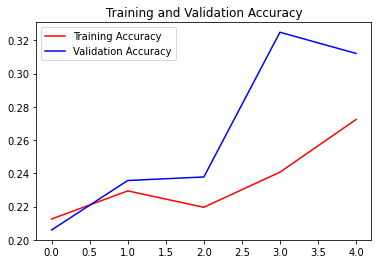

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotting Training Accuracy and Validation Accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

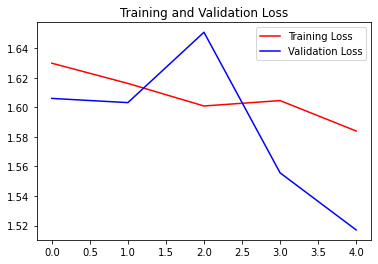

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotting Training Loss and Validation Loss
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()